In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv("Advertising.csv")

# basit lineer regresyon

basit doğrusal regresyon, tek bir açıklayıcı değişkene sahip doğrusal bir regresyon modelidir

In [123]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


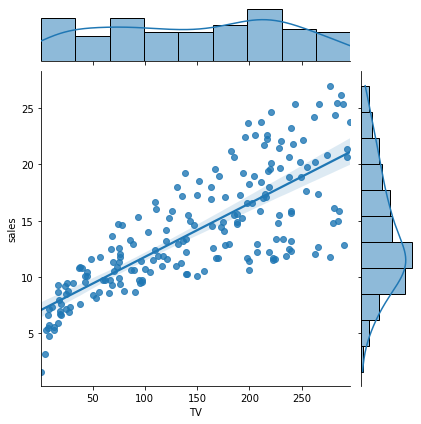

In [70]:
sns.jointplot(x = "TV", y = "sales", data = df ,  kind = "reg");

# Tv bağımsız değişkeni ile Sales bağımlı değişkenini modellemiş olduk
# doğrusal ve pozitif bir ilişki oldugunu gormüş olduk

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
X = df[["TV"]]
X.head() # bagımsız değişkenimi X'e atadım

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [73]:
y = df[["sales"]] # bağımlı değişkenimi y'ye atadım

In [74]:
reg = LinearRegression() # model nesnesi oluşturdum

In [75]:
model = reg.fit(X,y) # modeli fit ettim ,kurdum

In [76]:
model

LinearRegression()

In [77]:

dir(model)  #  modelimin içinden alabileceklerimi listeledim
            #  coef ifadesi katsayıyı
            #  intercept_ ise sabiti ifade eder formüldeki

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [78]:

model.intercept_ # formüldeki b0 sabitimiz

array([7.03259355])

In [79]:

model.coef_      # formüldeki b1 katsayısı

array([[0.04753664]])

In [80]:
# rkare
model.score(X,y)

# rkare: Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir
# yani; satışlardaki değişikliğin yaklaşık yüzde 60ı bağımsız değişken olan TV ile açıklanmaktadır

0.611875050850071

# Tahmin

C:\Users\APO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


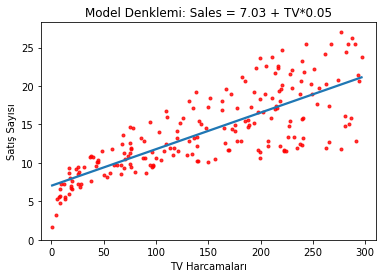

In [81]:
g = sns.regplot(df["TV"],df["sales"],ci= None , scatter_kws = {"color":"r","s":9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0);

In [82]:
# ortaya çıkan mavi çizgi modelimin denklemi
# ben bu yıl TV reklam harcamalarına ne kadar yatırım yaparsam satışlarım ne olur ? sorusuna cevap arıyorum

Sales = 7.03 + 0.05*Tv

In [83]:
  7.03 + 0.05*165 # örnek olarak manuel değer girerek yapmış olduk

15.280000000000001

In [84]:
model.predict([[165]]) # tahmin etme işlemi

array([[14.87613922]])

In [85]:
yeni_veri = [[5],[15],[30]] # örnek olark böyle bir tahmin gerçekleştirmek istiyorum ;

In [86]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

In [87]:
 # model, mavi çizgi ile çizilen fonskiyonu bulmak
    # tahmin ise bu fonk. kullanarak tahminlerde bulunmaktır.

# Artıklar

In [88]:
# amaç ; tahmin edilen değerler ile  gerçk değerler arasındaki farkları minimum yapmak

bunları göz önünde bulunduracağımız hata ölçüm metricler ise ; 

MSE : Hata Kareler Ortalaması
RMSE : Hata Kareler Ortalamasının Karekökü    

In [89]:
y.head(8)

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2


In [90]:
gerçek_y = y[0:10]

In [91]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [92]:
hatalar  = pd.concat([gerçek_y,tahmin_edilen_y], axis = 1 )

In [93]:
hatalar.columns = ["gerçek_y","tahmin_edilen_y"]

In [94]:
hatalar

,gerçek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [95]:
hatalar["hata"] = hatalar["gerçek_y"] - hatalar["tahmin_edilen_y"]

In [96]:
hatalar

,gerçek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [97]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [98]:
hatalar

,gerçek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [99]:
# MSE : Hata Kareler Ortalaması

In [100]:
np.mean(hatalar["hata_kareler"])
# 10 gözlem üzerinden manuel olarak hata karalerinin ortalamasını aldım

9.290350329638102

# Çoklu Doğrusal Regresyon

Temel amaç ; bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmak,
bağımlı değişkene etki eden bağımsız değişkenlerden hangisinin daha çok etki ettiğini bulmaktır

In [ ]:
###### Çoklu Doğrusal Regresyon Varsayımları;
# 1 - Hatalar normal dağılır
# 2 - hatalar birbirinden bağımsızdır ve otokorelasyon yoktur
# 3 - her bir gözlem için hata terimleri varyansları sabittir
# 4 - değişkenler ile hata terimi arasında ilişki yoktur
# 5 - bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur.

In [ ]:
###### Çoklu Doğrusal Regresyon  Avantajları
# 1 - doğrusallık-nedensellik yorumları yapılabilmesini sağlar, böylece stratejik modellleme imkanı verir
# 2 - değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir
# 3 - bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir (R2)
# 4 - model anlamlılığı değerlendirilebilir

In [ ]:
###### Çoklu Doğrusal Regresyon Dezavantajları
# 1 - varsayımları vardır
# 2 - aykırı gözlemlere duyarlıdır

In [110]:
X = df.drop("sales",axis = 1)
y = df[["sales"]]

In [111]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [109]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


# statsmodels ile model kurmak

In [114]:
import statsmodels.api as sm

In [115]:
lm = sm.OLS(y,X) 
model = lm.fit()

In [116]:
model.summary() # çoklu doğrusal regresyonun model cıktısı ,özetidir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                   2.43e-171
Time:                        16:34:01   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared (uncentered): bağımsız değişkenlerin bağımlı değişkenleri açıklama yüzdesi
Adj. R-squared (uncentered): düzeltilmiş R2 değeri : r2 ne kadar veri eklenirse o kadar şişer , işte bunun önğne geçmek için kullanılır
F-statistic: modelin anlamlılığını test eder şöyle ki ;
    Prob (F-statistic) : p value demektir 
        

t	     : elimizdeki katsayının anlamlı olup olmadıgını kontrol eder(coef)
P>|t|	 : p value : değişkenlerin anlamlı oldugunu görüyoruz ;
    istatistikteki hipotez testleri değişkenlerin anlamlı olmadığını söyleyen hipotezlerdir:
        0,05 değerinden küçük değerler elde ettiğimiz için bu modellemede kullanılan bu değişkenlerin anlamlı oldugunu gösterir
        sckit learn ile bu değerleri yorumlama şansımız yoktur

katsayıların yorumlanması : 
    diğer değişkenler sabit varsayıldıgında tv harcamalarında meydana gelebilecek 1 birimlik artış ;
    bağımlı değişkenmiz (sales) ortalama 0,05 birim artışa sebep olacaktır diyebiliriz

sonuç : 
    * modelimiz anlamlı
    * değişkenlerimizin hepsi anlamlı
    * bağımsız değişkenlerimiz bağımlı değişkenimizin yüzde 98.2sini açıklıyor 

# scikit learn ile model kurmak

In [117]:
lm = LinearRegression()

In [119]:
model = lm.fit(X,y)

In [120]:
model

LinearRegression()

In [121]:
model.intercept_ # sabit

array([2.93888937])

In [122]:
model.coef_ # katsayılarımız 

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [ ]:
# scikitlearn ile statsmodels arasında gözlem yaptığımızda katsayıların farklı oldugunu gorebiliriz
# bunun sebebi ; arka planda kullanmış oldukları parametre tahmin yöntemleridir

# çoklu doğrusal regresyonda tahmin

tahmin etmeye çalıştıgımız formul : 
    sales = 2,94 + Tv*0,04 + radio*0,9 - newspaper*0,001 # gazetenin - olması bağımlı değişkene olan etki olarak yo
    

soru : 30 birim TV , 10 birim radio , 40 birim gazeteye harcama yapılırsa satışımız ne olur ?

In [129]:
print(2.94 + 30*0.04 + 10*0.19 - 40*0.001) 

5.999999999999999


In [131]:
yeni_veri = [[30],[10],[40]]

In [132]:
yeni_veri = pd.DataFrame(yeni_veri).T

In [133]:
yeni_veri

,0,1,2
0,30,10,40


In [135]:
model.predict(yeni_veri) 


array([[6.15562918]])

# başarı değerlemesi , hata metrikleri

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [138]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [140]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [142]:
MSE  = mean_squared_error(y,model.predict(X)) # gerçek değerler ile tahmin edilen değerleri
MSE 

2.7841263145109365

In [144]:
RMSE = np.sqrt(MSE) # 
RMSE

1.66857014072257

# model doğrulama (tuning)

In [146]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [147]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# sınama seti

In [148]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# random_state her girdiğimde farklı sonuçlar gelmesini engellemek için

In [151]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [152]:
y_train

,sales
169,15.0
97,15.5
31,11.9
12,9.2
35,12.8
...,...
106,7.2
14,19.0
92,19.4
179,12.6


In [153]:
lm = LinearRegression()

In [ ]:
model = lm.fit(X_train, y_train)

In [154]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
# eğitim hatası

1.601247667558773

In [155]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.8159758162002493

In [ ]:
veri setimi Eğitim ve test için 2'ye böldük
eğitim üzerinde bir model kur ve bu modele ilişkin hatayı hesapladı
aynı işlemi test seti için de yapmış oldum

sonuç : 
    sınama seti dedğimiz bu yolda random state değerini değiştirdiğimde bu hata değerleri değişecektir 
    ayrıca her çalıştırdığımda farklı sonuçlar çıkacağından hangi 70 - 30 değerini alacağız ? 
---> işte bu  sebeple k-katlı cv kullanıyoruz

# k-katlı cv 

yukarıda belirtmiş oldugumuz ;
train setine yönelik elde etmiş oldugumuz hatayı daha verimli değerlendirmek adına kullanıyoruz

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
cross_val_score(model,X_train, y_train, cv = 10, scoring ="neg_mean_squared_error"  ) 
# cv kaç katlı oldugunu gösterir
# train seti üzerinden 10 farklı hata hesaplamış oldum 

array([-2.96702057, -2.73017719, -1.0956036 , -1.79851667, -2.28164874,
       -2.02886933, -2.50626956, -2.16858784, -8.58027515, -1.46692104])

In [160]:
# cv mse
np.mean(-cross_val_score(model,X_train, y_train, cv = 10, scoring ="neg_mean_squared_error"  ) )
#çıkan sonuçlarda negatif değerler  oldugu için eksi ile çarpıp tüm setin ortalamasını aldım


2.7623889698854316

In [161]:
# cv rmse
np.sqrt(np.mean(-cross_val_score(model,X_train, y_train, cv = 10, scoring ="neg_mean_squared_error"  ) ))


1.6620436125100422

In [ ]:
sonuç : eğer veri seti kümem yeteri kadar büyük ise ;
    en son nihayi test yapmak için test veri setini dışarıda bırakmak,
    dışarıda bırakılan bu test  setini daha sonra daha sonra en son modeli oluşturduğumda test etmek
---> train setini  tek bir veri gibi kabul edip bunun üzerinde gerçekleştirmemiz gerekir.
---> X_train, y_train sanki tek bir veriymiş gibi kabul ediliyor;
         kendi içinde bir model kurup (10 katlı oldugunu düşünerek) 1'i dışarıda bırakılıp , diğerleri ile devam ediliyor,
         bu işlem 10 kere tekrar ediliyor

neden bu işleme ihtiyaç duyuyoruz ? 
    bu işlem bize tek basına test ve train hatalarından daha doğru bir hata ölçüsü verir
    yani doğrulanmıştır.
    farklı varyasyonlar ile tekrar edilir dolayısıyla hepsinin ortalaması alındıgında valide edilmiş hatayı verir